CS20B1128 --- Data Science Project

Step 1:

In [2]:
# importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
df = pd.read_csv("AEP_hourly.csv")
print("="*50)
print("First Five Rows ","\n")
print(df.head(2),"\n")

print("="*50)
print("Information About Dataset","\n")
print(df.info(),"\n")

print("="*50)
print("Describe the Dataset ","\n")
print(df.describe(),"\n")

print("="*50)
print("Null Values t ","\n")
print(df.isnull().sum(),"\n")

First Five Rows  

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0 

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121273 entries, 0 to 121272
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  121273 non-null  object 
 1   AEP_MW    121273 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.9+ MB
None 

Describe the Dataset  

              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000 

Null Values t  

Datetime    0
AEP_MW      0
dtype: int64 



Step 2:
Reformat the Data Time Columns

In [4]:
# Extract all Data Like Year MOnth Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)

,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


Step 3:

In [5]:
# How many Unique Year do we Have in Dataset 
print(df.Year.unique(),"\n")
print("Total Number of Unique Year", df.Year.nunique(), "\n")

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018] 

Total Number of Unique Year 15 



Lets us see the energy consuption Each Year

Text(0.5, 1.0, 'Energy Consumption According to Year')

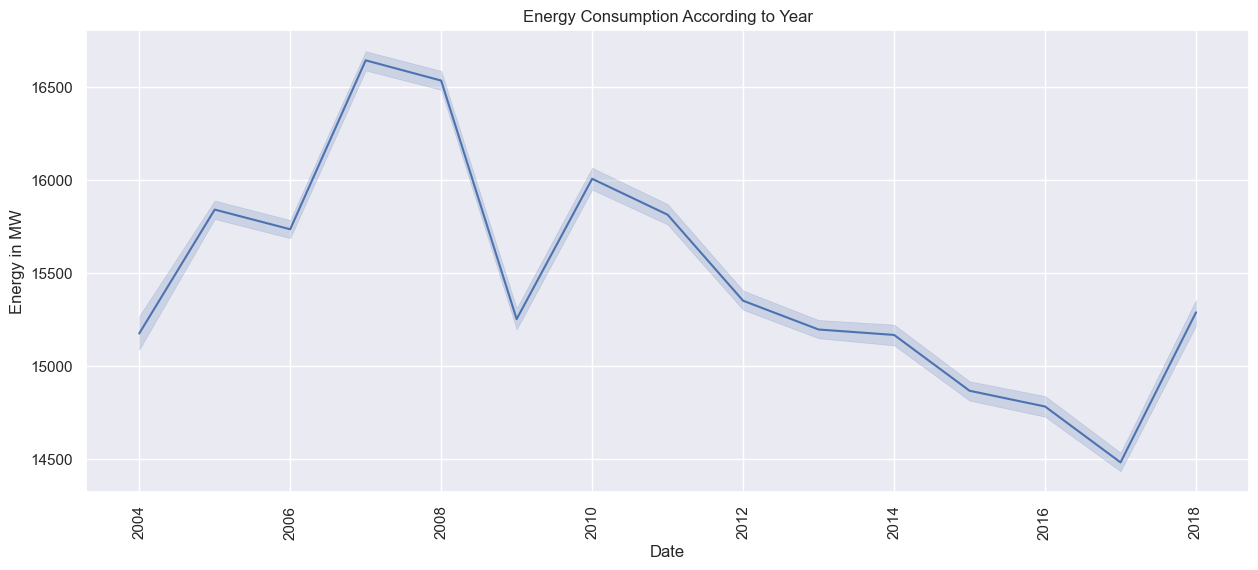

In [15]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumptionnin Year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Year")

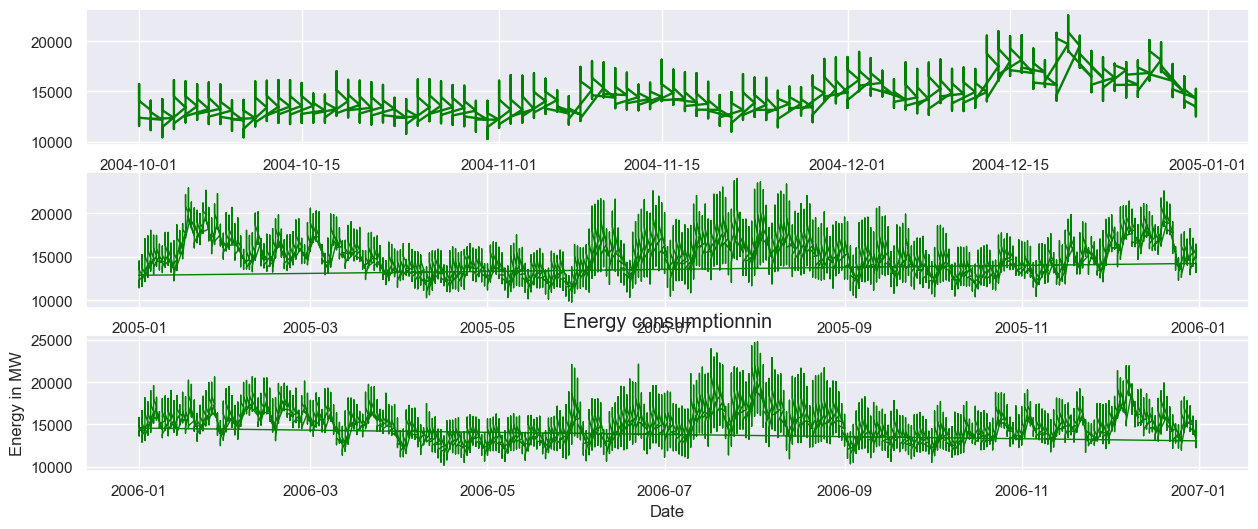

In [7]:
from matplotlib import style


fig = plt.figure()

ax1= fig.add_subplot(311)
ax2= fig.add_subplot(312)
ax3= fig.add_subplot(313)


style.use('ggplot')

y_2004 = dataset.loc["2004","AEP_MW"].tolist()
x_2004 = dataset.loc["2004","Date"].tolist()
ax1.plot(x_2004,y_2004, color="green", linewidth=1.7)


y_2005 = dataset.loc["2005","AEP_MW"].tolist()
x_2005 = dataset.loc["2005","Date"].tolist()
ax2.plot(x_2005, y_2005, color="green", linewidth=1)


y_2006 = dataset.loc["2006","AEP_MW"].tolist()
x_2006 = dataset.loc["2006","Date"].tolist()
ax3.plot(x_2006, y_2006, color="green", linewidth=1)


plt.rcParams["figure.figsize"] = (18,8)
plt.title("Energy consumptionnin")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)


Energy Distribution

C:\Users\LOKESH\AppData\Local\Temp\ipykernel_14492\2760412893.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["AEP_MW"])


Text(0.5, 1.0, 'Ennergy Distribution')

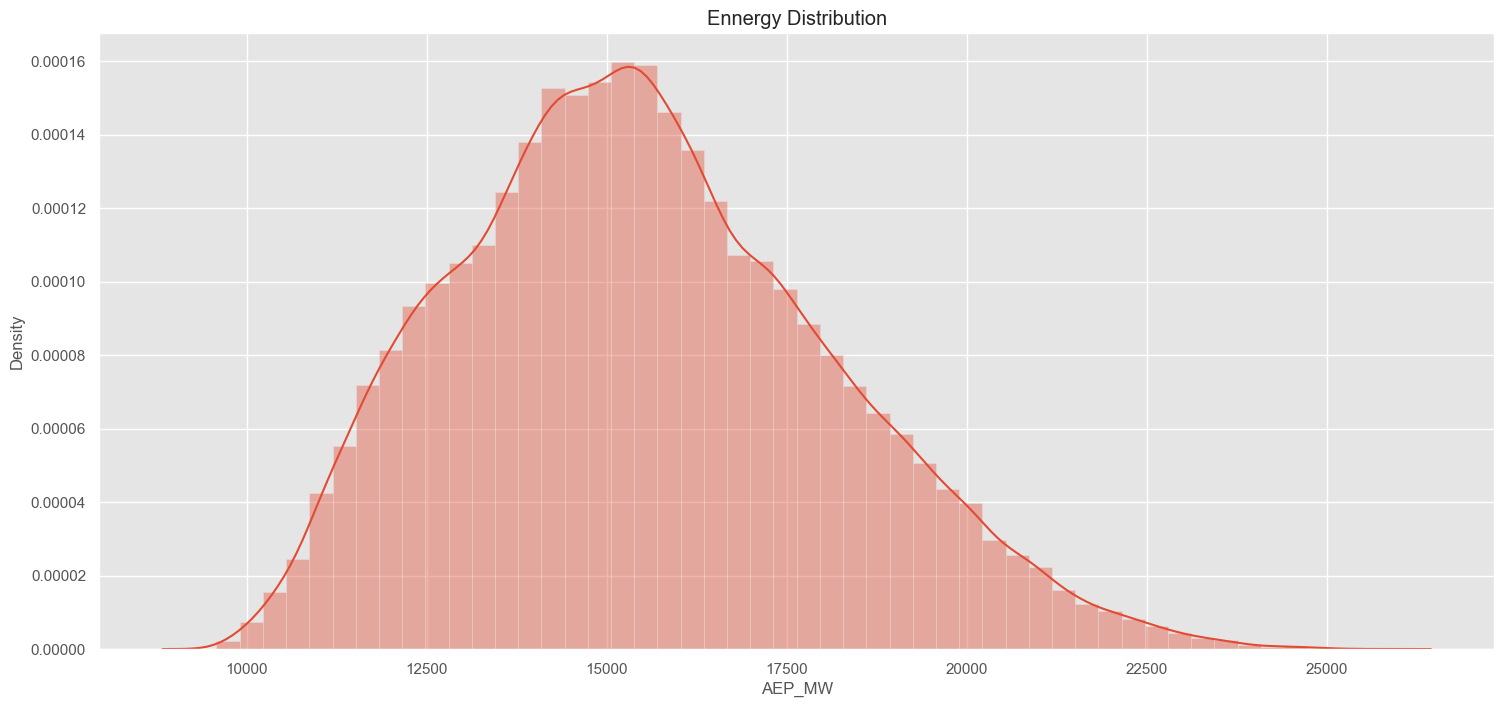

In [8]:
sns.distplot(dataset["AEP_MW"])
plt.title("Ennergy Distribution")

Energy with Respect to Day

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to Day')

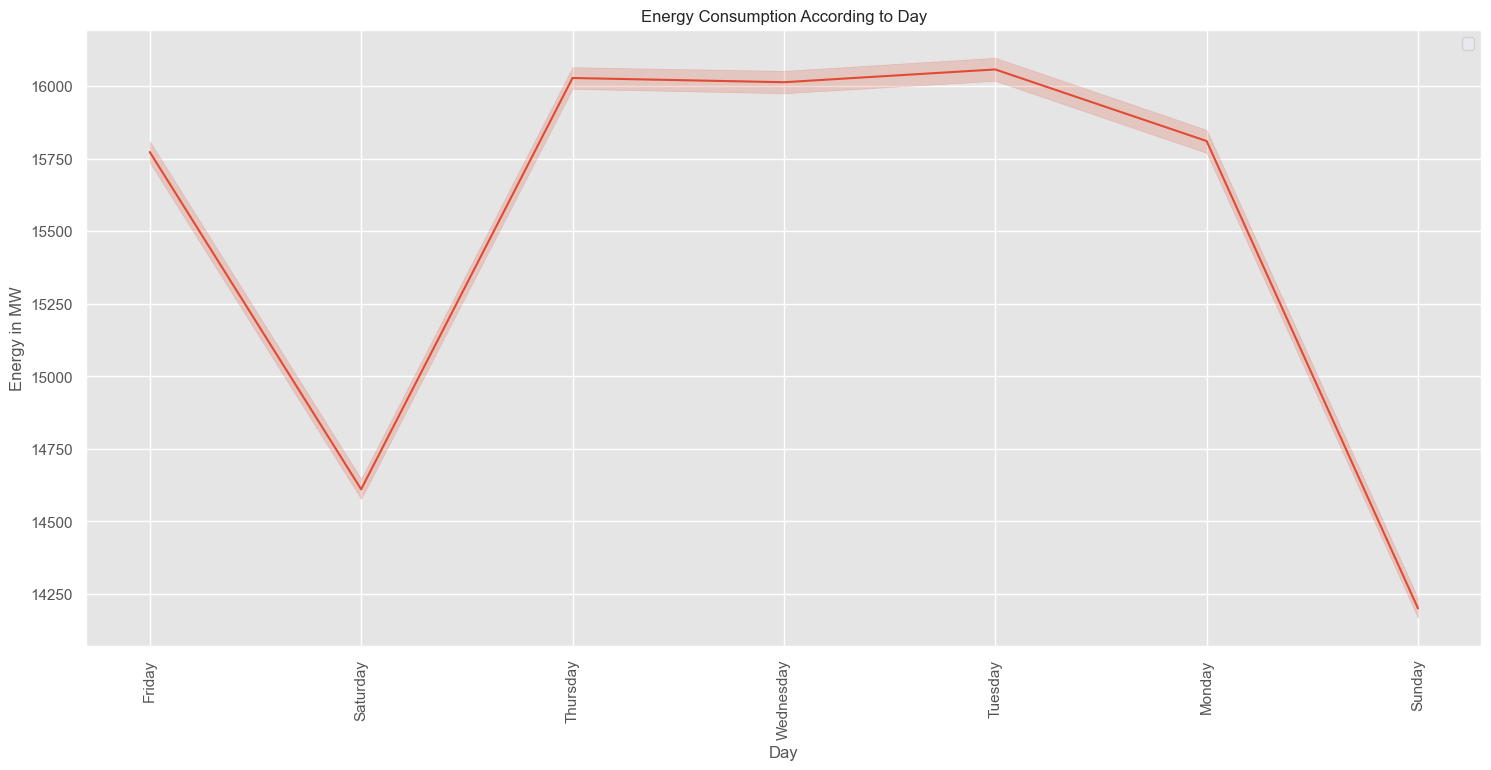

In [9]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))


sns.lineplot(x=dataset["Day"], y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})

plt.xlabel("Day")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Energy Consumption According to Day")

Resampleing Data

In [10]:
NewDataSet = dataset.resample('D').mean()
print("Old Dataset ",dataset.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (121273, 7)
New  Dataset  (5055, 4)


C:\Users\LOKESH\AppData\Local\Temp\ipykernel_14492\4024687517.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  NewDataSet = dataset.resample('D').mean()


Linear Reggresion Model

In [14]:
y = NewDataSet["AEP_MW"]
y1 = y
X = NewDataSet.drop(labels="AEP_MW", axis=1)

scaler = MinMaxScaler(feature_range=(0, 1))
X2 = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Splitting to 70% train and 30%test datasets.
X_train,X_test,y_train,y_test = train_test_split(X2,y,test_size = 0.3, random_state = 42)

model = LinearRegression().fit(X_train, y_train)
predicted_price = model.predict(X_test)

print(predicted_price)



[15477.04553713 16014.84022476 15805.72367662 ... 15340.13459449
 15898.93959848 15588.27300262]


<bound method RegressorMixin.score of LinearRegression()>

Comparition b/w Actual to prediction

In [12]:
True_MegaWatt = y_test.tolist()
Predicted_MegaWatt  = predicted_price
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y1,test_size = 0.3, random_state = 42)
dates = X1_test["Year"].tolist()

Text(0.5, 1.0, 'Energy Consumptions Pridicted vs Actual')

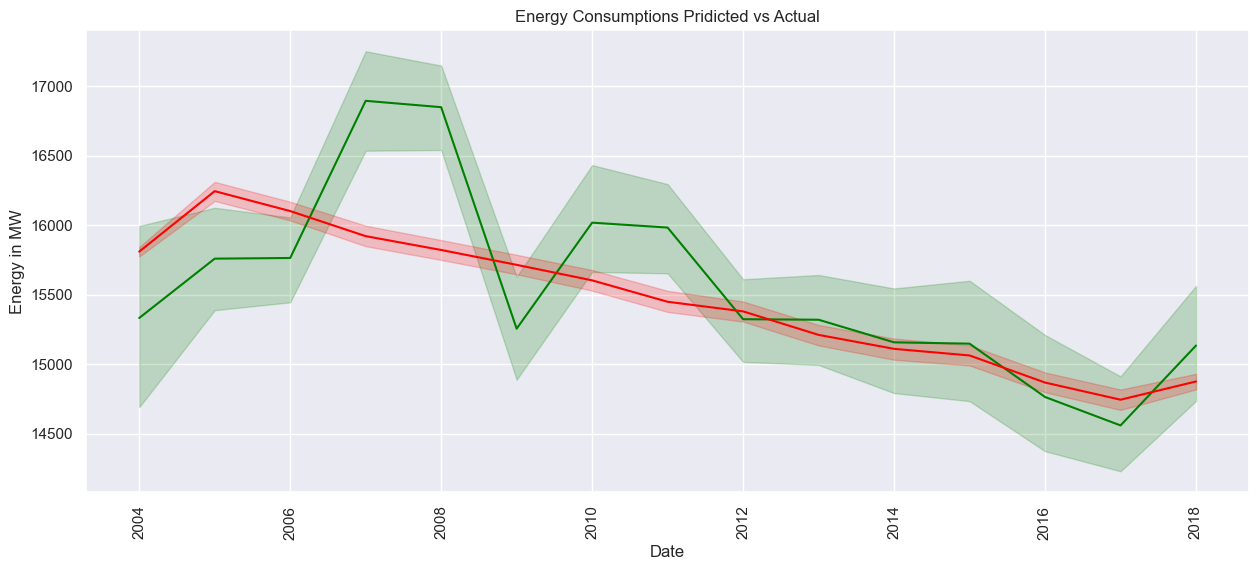

In [13]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

sns.lineplot(x=dates, y=y,color="green")
sns.lineplot(x=dates, y=y1,color="red")

sns.set(rc={'figure.figsize':(15,6)})
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

plt.title("Energy Consumptions Pridicted vs Actual")

Thank You